---

---


Código para análise de dados do Experimento 3 de Laboratório de Física I

Feito pelo aluno

 Vinícius dos Passos de Souza, RA: 11201922119

---



**Para este experimento os ajustes de funções foram feitos com a função Scipy** 

Para este experimento foram feitas diversas medidas que devem ser analisadas separadamente, por isso esse código terá as partes.

**Análise de pequenas oscilações quando $z =0.33450 \pm 0.00005$**

In [1]:
#Adicionar excel aqui e ler ele
import pandas as pd

x = [[],[],[],[],[]]#tempos
y = [[],[],[],[],[]]#angulos

for i in range(5):
    data = pd.read_csv(f'Dados\sem_pesos_2_angulo_{i+1}.txt', sep = "	")
    y[i] = data['Posicao angular ( rad )'].values
    x[i] = data['Tempo ( s )'].values
#the1 = data1['Posicao angular ( rad )'].values
#t1=data1['Tempo ( s )'].values


**ACHANDO Picos COM SCIPY**


In [2]:
from scipy.signal import find_peaks
import numpy as np

ind = [[],[],[],[],[]]
for i in range(5):
    peaks= find_peaks(y[i],height=0)
    ind[i] = peaks[0]

#variaveis que vou usar
th= [np.ones(len(ind[0])),np.ones(len(ind[1])),np.ones(len(ind[2])),
      np.ones(len(ind[3])),np.ones(len(ind[4]))] #picos
t_peaks =  [np.ones(len(ind[0])),np.ones(len(ind[1])),np.ones(len(ind[2])),
      np.ones(len(ind[3])),np.ones(len(ind[4]))] #tempos de picos
#arrumar tempos e picos

for j in range(len(ind)):
    u = 0
    for i in ind[j]:
        t_peaks[j][u]=x[j][i]
        th[j][u] = y[j][i]
        u=u+1

    


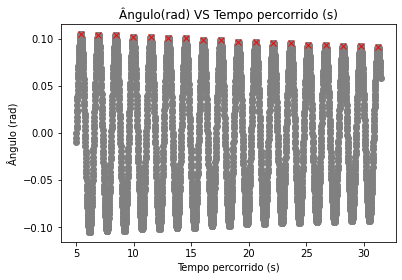

In [3]:
from matplotlib import pyplot as plt

plt.plot(x[0],y[0],'o',color='gray')
plt.plot(t_peaks[0], th[0], "x",color='red')


plt.ylabel('Ângulo (rad)')
plt.xlabel('Tempo percorrido (s)')
#plt.ylim(0,0.27)
#plt.xlim(2,15)
plt.title('Ângulo(rad) VS Tempo percorrido (s)')
plt.show()

Achar período dados os tempos

In [4]:
T1 = [[],[],[],[],[]] #picos
for u in range(5):
    for i in range(len(t_peaks[u])-1):
        T1[u].append(round(t_peaks[u][i+1]-t_peaks[u][i],3))
    
print(T1[0])#printar um intervalo ae

[1.52, 1.51, 1.52, 1.53, 1.51, 1.52, 1.52, 1.52, 1.52, 1.52, 1.51, 1.52, 1.52, 1.52, 1.52, 1.52, 1.51]


**Cálculo da Média do periodo e do Desvio padrão**

Para cálculo do T usarei 

$T_m = \frac{1}{N}\sum_{i=1}^nT_i $

$\sigma_T = \frac{1}{\sqrt{N(N-1)}}\sqrt{ \sum_{i}(T_m-T_i )^2}$

In [5]:
T_m1 = np.ones(len(x))
eT_m1=np.ones(len(x))
for u in range(len(x)):
    sum=0
    for i in T1[u]:
        sum = sum+i
    T_m1[u]=sum/len(T1[u])
for u in range(len(x)):
    et=0
    for i in T1[u]:
        et= et+ (T_m1[u]-i)**2
    eT_m1[u]=np.sqrt(et/(len(T1[u])*(len(T1[u])-1)))

    print(f'T = {round(T_m1[u],4)}+-{round(eT_m1[u],4)}')

T = 1.5182+-0.0013
T = 1.5189+-0.0011
T = 1.518+-0.0016
T = 1.5189+-0.0015
T = 1.5184+-0.0012


In [6]:
Tm1 = 0
eTm1=0
for i in T_m1:
    Tm1 = Tm1+i
Tm1=Tm1/5
for i in T_m1:
    eTm1+=(Tm1-i)**2
eTm1 = np.sqrt(eTm1/(5*(5-1)))
print(f'T_medio={Tm1}+-{eTm1}')

T_medio=1.5185102167182662+-0.00019053306704905598


**Dados medidos no começo do experimento**

In [7]:
#Tudo no SI
Lp=0.470
eLp=0.27/1000

M = 0.22043
eM = 0.00001



g=9.8



CalcuLAR VALOR EXPERIMENTAL DE I

$I = \frac{T^2(M+m)gL_{CM}}{4 \pi^2}$

$\sigma_I = \frac{1}{2 \pi}\sqrt{ (T(M+m)gL_{CM}\sigma_T)^2 + 2(T^2gL_{CM}\sigma_M)^2+(T^2(M+m)g\sigma_{LCM})^2   }$

In [10]:
Iexp=Tm1**2*(M)*g*Lp/(4*np.pi**2)
eIexp=np.sqrt( (Tm1*(M)*g*Lp*eTm1)**2 + (Tm1**2*g*Lp*eM)**2+(Tm1**2*(M)*g*eLp)**2)/(2*np.pi)

print(f'I_EXP = {Iexp*10000}+-{eIexp*10000} kg cm^2')




I_EXP = 593.0213567079502+-2.1974780016145763 kg cm^2


---
---
---
---
---

AGORA ANALiSAR OS DADOS PRELIMINARED

In [119]:
x1 = [[],[],[],[],[],[]]#tempos
y1 = [[],[],[],[],[],[]]#angulos

for i in range(6):
    data = pd.read_csv(f'Dados\com_pesos_1_angulo_{i+1}.txt', sep = "	")
    y1[i] = data['Posicao angular ( rad )'].values
    x1[i] = data['Tempo ( s )'].values


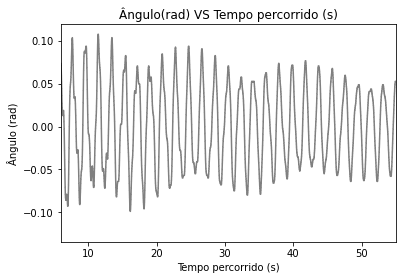

In [123]:
from matplotlib import pyplot as plt
y2 = np.ones(len(y1[0]))
for i in range(len(y1[0])):
    y2[i]=y1[0][i]**2

plt.plot(x1[0],y1[0],'-',color='gray')



plt.ylabel('Ângulo (rad)')
plt.xlabel('Tempo percorrido (s)')
#plt.ylim(0,0.27)
plt.xlim(6,55)
plt.title('Ângulo(rad) VS Tempo percorrido (s)')
plt.show()

In [121]:
from scipy.optimize import curve_fit
from scipy import optimize 


def model_fit(x, a, b,c,d):
    return a*np.sin(b*x)*np.cos(c*x+d)
a_opt = np.ones(3)
b_opt=np.ones(3)
c_opt=np.ones(3)
d_opt=np.ones(3)
std=[[],[],[],[]]
for i in range(3):
    parameters, covariance = curve_fit(model_fit,x1[i],y1[i],p0=[4,4,5,1])
    a_opt[i], b_opt[i],c_opt[i],d_opt[i]= parameters
    #calculo do erro
    std[i] = np.sqrt(np.diag(covariance))


print(f'a={a_opt}+-{std[0]} ')
print(f'b={b_opt}+-{std[1]} ')
print(f'b={c_opt}+-{std[2]} ')
print(f'b={d_opt}+- ')

a=[-0.00669252 -0.00570887  0.00745305]+-[0.00043347 0.00184166 0.00407047 0.14406876] 
b=[4.02568056 4.00140357 4.01003677]+-[0.00040297 0.0015442  0.00309777 0.14195084] 
b=[4.99404465 5.00137633 4.98704359]+-[0.00051446 0.00162576 0.00324174 0.13757513] 
b=[0.65127367 0.74917106 1.9452456 ]+- 


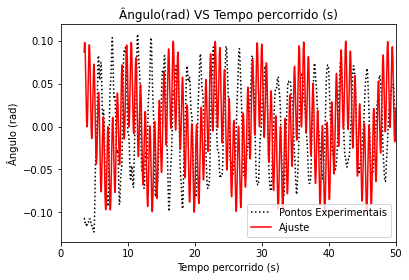

In [122]:
plt.plot(x1[0],y1[0],':',color='black', label='Pontos Experimentais')
plt.plot(x1[0], model_fit(x1[0],0.1,b_opt[0],5,1), "-",color='red', label='Ajuste')

plt.legend()
plt.ylabel('Ângulo (rad)')
plt.xlabel('Tempo percorrido (s)')
#plt.ylim(0,0.27)
plt.xlim(0,50)
plt.title('Ângulo(rad) VS Tempo percorrido (s)')
plt.show()

----
----
----
--------


**Analisar angulo das polias**

**Setup 1**

In [107]:
import pandas as pd

data = pd.read_csv('Dados\Videos\com_pesos_1.txt', sep = "	")
y = data['y'].values
x = data['x'].values
t = data['t'].values

theta=np.ones(len(t)-30)
t1=np.ones(len(t)-30)
for i in range(0,len(t)-30):
    theta[i]=np.arctan(y[i+30]/x[i+30])
    t1[i]=t[i+30]

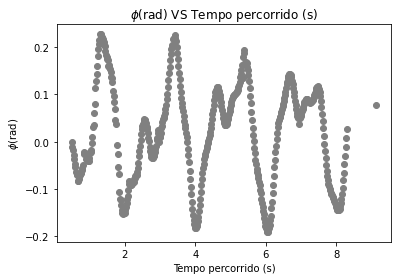

In [109]:
from matplotlib import pyplot as plt

plt.plot(t1,theta,'o',color='gray')



plt.ylabel('$ \phi $(rad)')
plt.xlabel('Tempo percorrido (s)')
#plt.ylim(0,0.27)
#plt.xlim(6,55)
plt.title('$ \phi $(rad) VS Tempo percorrido (s)')
plt.show()

**Setup 2**

In [4]:
import pandas as pd
import numpy as np

data = pd.read_csv('Dados\Videos\com_pesos_2.txt', sep = "	")
y = data['y'].values
x = data['x'].values
t = data['t'].values

theta2=np.ones(len(t))
t2=np.ones(len(t))
for i in range(0,len(t)):
    theta2[i]=np.arctan(x[i]/y[i])
    t2[i]=t[i]

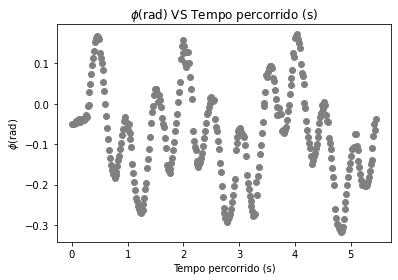

In [5]:
from matplotlib import pyplot as plt

plt.plot(t2,theta2,'o',color='gray')



plt.ylabel('$ \phi $(rad)')
plt.xlabel('Tempo percorrido (s)')
#plt.ylim(0,0.27)
#plt.xlim(6,55)
plt.title('$ \phi $(rad) VS Tempo percorrido (s)')
plt.show()

**Setup 3**

In [3]:
import pandas as pd
import numpy as np

data = pd.read_csv('Dados\Videos\com_pesos_3.txt', sep = "	")
y = data['y'].values
x = data['x'].values
t = data['t'].values

theta3=np.ones(len(t))
t3=np.ones(len(t))
for i in range(0,len(t)):
    theta3[i]=np.arctan(x[i]/y[i])
    t3[i]=t[i]

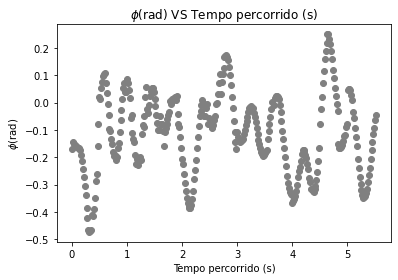

In [4]:
from matplotlib import pyplot as plt

plt.plot(t3,theta3,'o',color='gray')



plt.ylabel('$ \phi $(rad)')
plt.xlabel('Tempo percorrido (s)')
#plt.ylim(0,0.27)
#plt.xlim(6,55)
plt.title('$ \phi $(rad) VS Tempo percorrido (s)')
plt.show()